Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Install the library using which we can directly download files using their google drive link

In [2]:
pip install gdown

  Created wheel for gdown: filename=gdown-3.10.0-cp36-none-any.whl size=9824 sha256=3b6bdb0066ba7ca517f5907c1e9c4f7125f9998f91cfa5468114752dbe9b5538
  Stored in directory: /root/.cache/pip/wheels/45/29/a5/dd3da737c69cb0a46e35ae94e7aa26f2600b4cc7e7b4d4bd44
Successfully built gdown
Note: you may need to restart the kernel to use updated packages.


In [3]:
import gdown

url = 'https://drive.google.com/uc?id=1sDCcgXbby8_v3Z59oRjrh1igEukx8HMI'  

output = 'orbuculum.tar.gz'

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1sDCcgXbby8_v3Z59oRjrh1igEukx8HMI
To: /kaggle/working/orbuculum.tar.gz
36.8MB [00:00, 94.9MB/s]


'orbuculum.tar.gz'

Extract the downloaded .tar file

In [4]:
import tarfile
tar = tarfile.open('/kaggle/working/orbuculum.tar.gz')
tar.extractall()
tar.close()

Let's first read the dataframe csv file

In [14]:
df = pd.read_csv('/kaggle/working/task/annotation.csv')
df.head()

,image,labels
0,20151127_130005,"['bread', 'pizzoccheri', 'potatoes', 'savory_p..."
1,20151204_121047,['lasagna_bolognese']
2,20151204_121641,['lasagna_bolognese']
3,20151211_134539_2,"['bread', 'pasta', 'fillet_fish', 'potatoes', ..."
4,20151130_114633_1,"['bread', 'pasta', 'meat', 'peas']"


We have two columns. One has the image names. These images are located are located in the 'data' folder extracted from the downloaded .tar file.

The other column has lists containing the labels of food items in those images

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
image     1400 non-null object
labels    1400 non-null object
dtypes: object(2)
memory usage: 22.0+ KB


We have a total of 100 samples. Also, the values are not of numerical type

In [7]:
df.describe()

,image,labels
count,1400,1400
unique,1400,611
top,20151204_120117_1,['pasta']
freq,1,53


We can assume that all the images are unique since we have 1400 unique names. 

We also have 53 images in which the sole food item is Pasta.

In [9]:
df.isnull().sum()

image     0
labels    0
dtype: int64

We don't have any missing values.

Let's grab and plot five images at random and plot their labels alongside.

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


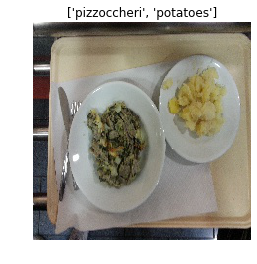

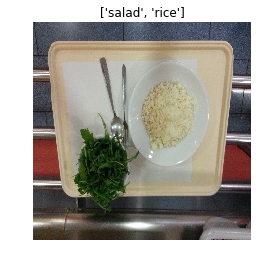

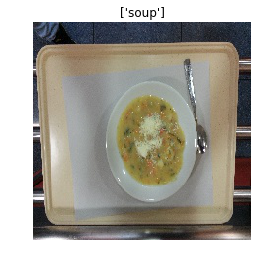

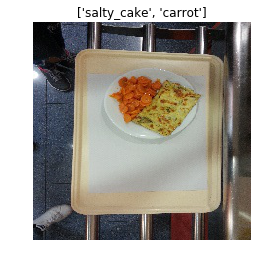

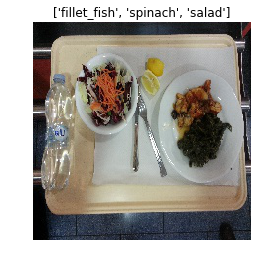

In [10]:
img_dir = '/kaggle/working/task/data/'
np.random.seed(69)
random_samples = np.random.randint(0, len(df), 5)
for sample in random_samples:
  img  = plt.imread(img_dir + df.loc[sample, 'image'] + '.jpg') 
  print(img.shape)
  plt.figure(), plt.imshow(img), plt.axis('off'), plt.title(df.loc[sample, 'labels'])  

We can also safely assume that all images have the same dimensions (3 channels each with 224x224 pixels)

In [11]:
labels_not_unique = 0
for label in df['labels']:
  label_list = [item.strip("'") for item in label.strip("[]").split(', ')]
  if len(set(label_list)) != len(label_list):
    labels_not_unique += 1

print(labels_not_unique)

172


We also have 172 cases where the labels list have repeating items.

In [12]:
all_labels = []
for label in df['labels']:
  label_list = [item.strip("'") for item in label.strip("[]").split(', ')]
  for item in label_list:
    if item not in all_labels:
      all_labels.append(item)
    
all_labels

['bread',
 'pizzoccheri',
 'potatoes',
 'savory_pie',
 'lasagna_bolognese',
 'pasta',
 'fillet_fish',
 'green_beans',
 'yogurt',
 'meat',
 'peas',
 'fennel_gratin',
 'carrot',
 'tangerine',
 'orange',
 'pizza',
 'pudding',
 'scallops',
 'rice',
 'banana',
 'cutlet',
 'spinach',
 'salty_cake',
 'pears',
 'squid_stew',
 'apple',
 'salad',
 'wet_zucchini',
 'salmon',
 'fries',
 'cake',
 'soup',
 'bruscitt']

In [13]:
len(all_labels)

33

We have a total of 33 unique food items.